In [1]:
#AŞAMA 1: GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ

In [2]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# MLP ve RBF modelleri için
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [5]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install numpy scikit-learn matplotlib seaborn keras


Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Veri işleme için
import pandas as pd
import numpy as np

# Model oluşturma ve veri ayırma için
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# MLP ve RBF modelleri için
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Input

In [8]:
#AŞAMA 2: VERİ SETİ YÜKLEME VE İŞLEME

In [9]:
import pandas as pd

# CSV dosyalarını yükleme
train_labels = pd.read_csv('data/Train.csv')
test_labels = pd.read_csv('data/Test.csv')

# İlk birkaç satırı görüntüleme
print("Train Labels:")
print(train_labels.head())
print("\nTest Labels:")
print(test_labels.head())

Train Labels:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test Labels:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57   

In [10]:
#AŞAMA 3: GÖRÜNTÜ YÜKLEME VE İŞLEME

In [11]:
from PIL import Image
import numpy as np

# Eğitim görüntülerini ve etiketlerini yükleme
train_images = []
train_labels_list = []

for index, row in train_labels.iterrows():
    image_path = 'data/' + row['Path']  # Görüntü dosyasının yolu
    image = Image.open(image_path).convert('RGB')  # Görüntüyü RGB formatında yükleyin
    image = image.resize((32, 32))  # Boyutları model için ayarlayın (örneğin, 32x32)
    train_images.append(np.array(image))  # Görüntüyü listeye ekleyin
    train_labels_list.append(row['ClassId'])  # Sınıf etiketini ekleyin

# Görüntü ve etiketleri numpy dizilerine çevirme
train_images = np.array(train_images)
train_labels_list = np.array(train_labels_list)

print("Eğitim görüntüleri boyutu:", train_images.shape)
print("Eğitim etiketleri boyutu:", train_labels_list.shape)

Eğitim görüntüleri boyutu: (39209, 32, 32, 3)
Eğitim etiketleri boyutu: (39209,)


In [12]:
#AŞAMA 4: MODEL OLUŞTURMA VE EĞİTME


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

# Veriyi Hazırlama
train_labels_categorical = to_categorical(train_labels_list)

# MLP Modelini Tanımlama
model = Sequential()
model.add(Input(shape=(32, 32, 3)))  # Giriş katmanı
model.add(Flatten())  # Düzleştirme katmanı
model.add(Dense(64, activation='relu'))  # Gizli katman
model.add(Dropout(0.4))  # Dropout eklenmesi (aşırı öğrenmeyi engellemeye yardımcı olur)
model.add(Dense(43, activation='softmax'))  # Çıkış katmanı

# Modeli derleme (örneğin, optimizer ve loss belirleyerek)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini görmek için
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,467 (779.17 KB)

 Trainable params: 199,467 (779.17 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#VERİYİ STANDARTLAŞTIRMA VEYA NORMALLEŞTİRME

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images.reshape(-1, 32 * 32 * 3))
train_images_scaled = train_images_scaled.reshape(-1, 32, 32, 3)

In [16]:
#Veriyi Eğitim ve Doğrulama için Bölme:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images_scaled, train_labels_categorical, test_size=0.2, random_state=42)


In [17]:
#Modeli Eğitme

In [18]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=10, 
                    batch_size=32)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3558 - loss: 2.7025 - val_accuracy: 0.7805 - val_loss: 0.8491
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6568 - loss: 1.1772 - val_accuracy: 0.8370 - val_loss: 0.5730
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7318 - loss: 0.9191 - val_accuracy: 0.8558 - val_loss: 0.5266
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7685 - loss: 0.7904 - val_accuracy: 0.8796 - val_loss: 0.4681
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7724 - loss: 0.7741 - val_accuracy: 0.8908 - val_loss: 0.4185
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7948 - loss: 0.6908 - val_accuracy: 0.8944 - val_loss: 0.3804
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8102 - loss: 0.6314 - val_accuracy: 0.8907 - val_loss: 0.3903
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8140 - loss: 0.6392 - val_accuracy: 0.

In [19]:
#EĞİTİM SONUÇLARINI GÖRÜNTÜLEME

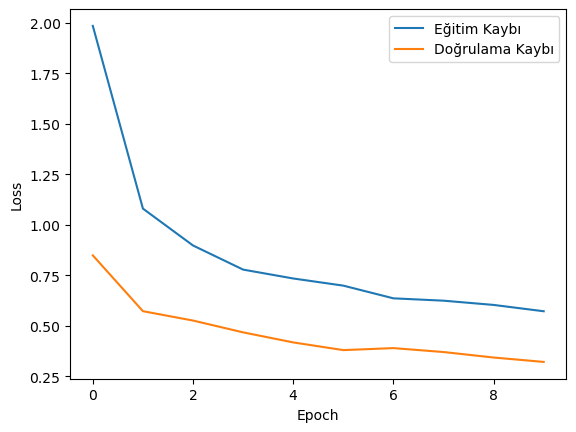

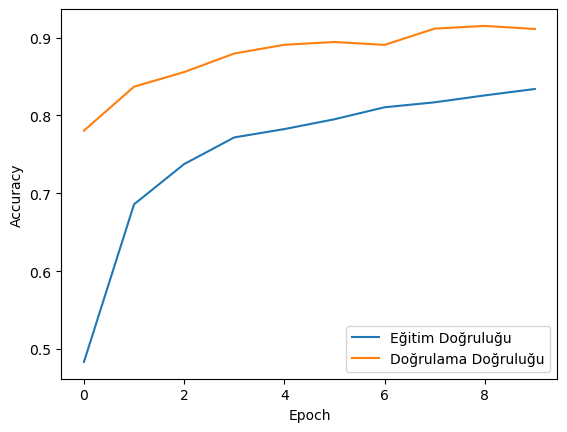

In [20]:
import matplotlib.pyplot as plt

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [21]:
import pandas as pd
from PIL import Image
import numpy as np

# Test etiket dosyasını yeniden yükleyin (CSV formatında olduğunu varsayıyoruz)
test_labels = pd.read_csv('data/Test.csv')

# Test görüntülerini ve etiketlerini yüklemek için boş listeler oluştur
test_images = []
test_labels_list = []

# Test etiket dosyanızı yükleyin
for index, row in test_labels.iterrows():
    image_path = 'data/' + row['Path']  # Görüntü dosyasının yolu
    image = Image.open(image_path).convert('RGB')  # Görüntüyü RGB formatında yükleyin
    image = image.resize((32, 32))  # Boyutları model için ayarlayın (32x32)
    test_images.append(np.array(image))  # Görüntüyü listeye ekleyin
    test_labels_list.append(row['ClassId'])  # Sınıf etiketini ekleyin

# Görüntüleri ve etiketleri numpy dizilerine çevirin
test_images = np.array(test_images)
test_labels_list = np.array(test_labels_list)

In [22]:
from tensorflow.keras.utils import to_categorical

# Test etiketlerini one-hot encoding yaparak dönüştürme
test_labels_list = to_categorical(test_labels_list)

In [23]:
# Modeli test verisi üzerinde değerlendirme
test_loss, test_accuracy = model.evaluate(test_images, test_labels_list)

print("Test Kayıp (Loss):", test_loss)
print("Test Doğruluğu (Accuracy):", test_accuracy)

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8038 - loss: 68.9993
Test Kayıp (Loss): 69.03533935546875
Test Doğruluğu (Accuracy): 0.8061757683753967


In [24]:
# Modeli Değerlendirme ve Analiz Etme

395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


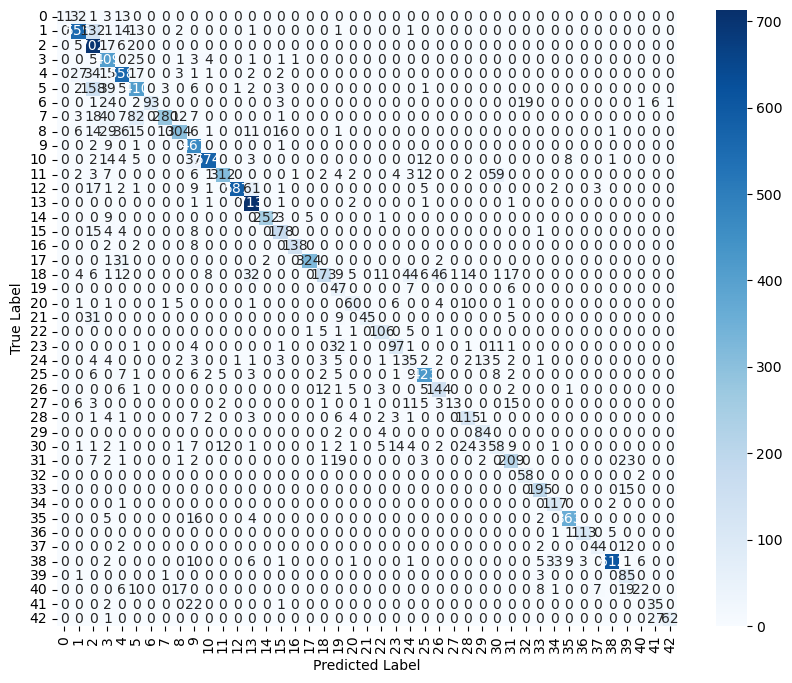

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Test verisi üzerinde tahmin yap
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Her tahmin için en yüksek olasılık verilen sınıfı seç

# Confusion matrix oluştur
cm = confusion_matrix(np.argmax(test_labels_list, axis=1), y_pred_classes)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(test_labels_list, axis=1), y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.18      0.31        60
           1       0.86      0.77      0.81       720
           2       0.60      0.94      0.73       750
           3       0.63      0.91      0.74       450
           4       0.78      0.85      0.81       660
           5       0.68      0.65      0.66       630
           6       1.00      0.62      0.77       150
           7       0.95      0.62      0.75       450
           8       0.87      0.68      0.76       450
           9       0.73      0.97      0.84       480
          10       0.96      0.87      0.91       660
          11       0.94      0.74      0.83       420
          12       1.00      0.85      0.92       690
          13       0.84      0.99      0.91       720
          14       0.99      0.93      0.96       270
          15       0.82      0.85      0.84       210
          16       0.99      0.92      0.95       150
          17       0.98    

In [27]:
import os
print(os.listdir('data'))

['archive.zip', 'Meta', 'Meta.csv', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [28]:
train_labels_list = pd.read_csv('data/Train.csv')['ClassId'].values
test_labels_list = pd.read_csv('data/Test.csv')['ClassId'].values

In [29]:
#Moodel Eğitimi

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Eğitim etiketlerini kategorik hale getirin
train_labels = to_categorical(train_labels_list)
test_labels = to_categorical(test_labels_list)

# Modeli tanımlayın
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Giriş katmanı
    Dense(128, activation='relu'),     # Gizli katman
    Dense(len(train_labels[0]), activation='softmax')  # Çıkış katmanı
])

# Modeli derleyin
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitin
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10


C:\Users\sulta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0517 - loss: 17.9656 - val_accuracy: 0.0570 - val_loss: 3.5262
Epoch 2/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0569 - loss: 3.5205 - val_accuracy: 0.0594 - val_loss: 3.4763
Epoch 3/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0593 - loss: 3.4910 - val_accuracy: 0.0570 - val_loss: 3.4666
Epoch 4/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0580 - loss: 3.4874 - val_accuracy: 0.0570 - val_loss: 3.4641
Epoch 5/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0565 - loss: 3.4842 - val_accuracy: 0.0594 - val_loss: 3.4633
Epoch 6/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0542 - loss: 3.4823 - val_accuracy: 0.0594 - val_loss: 3.4630
Epoch 7/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0577 - loss: 3.4851 - val_accuracy: 0.0594 - val_loss: 3.4629
Epoch 8/10
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0555 - loss: 3.4811 - val_accura

In [31]:
#EĞİTİM VE DOĞRULAMA GRAFİKLERİ ÇİZME

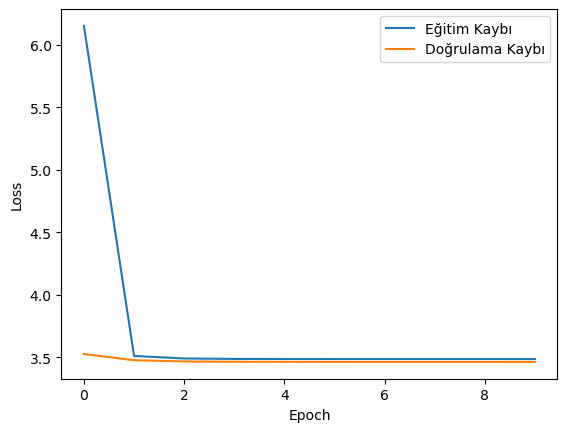

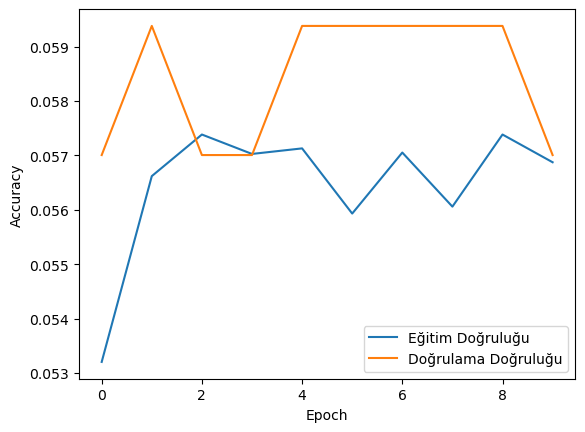

In [32]:
import matplotlib.pyplot as plt

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Kayıp (Loss):", test_loss)
print("Test Doğruluğu (Accuracy):", test_accuracy)


395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0582 - loss: 3.4651
Test Kayıp (Loss): 3.4628419876098633
Test Doğruluğu (Accuracy): 0.05700712651014328


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


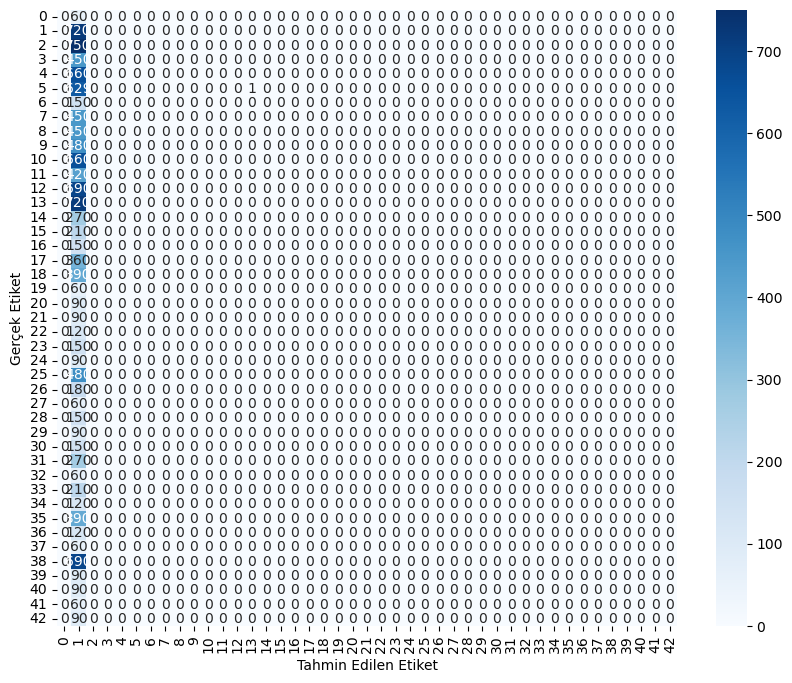

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tahminleri al
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Tahmin edilen sınıf etiketleri
y_true = np.argmax(test_labels, axis=1)     # Gerçek sınıf etiketleri

# Karışıklık matrisi oluştur
cm = confusion_matrix(y_true, y_pred_classes)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()


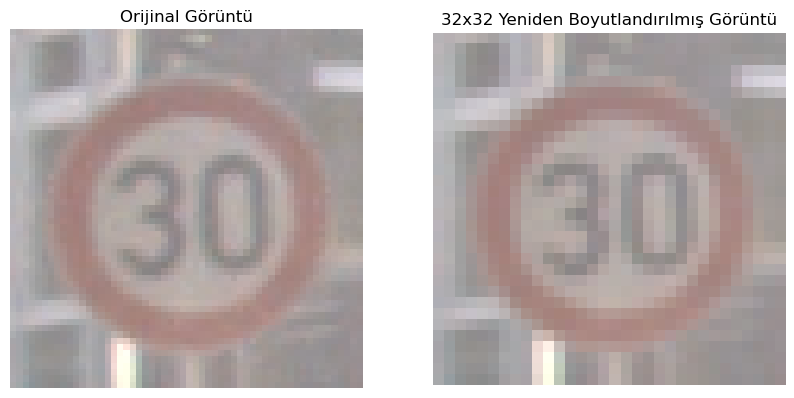

In [35]:
import matplotlib.pyplot as plt
from PIL import Image

# Örnek bir görsel yükle (Path'i veri setindeki bir görüntüyle değiştir)
image_path = 'C:/Users/sulta/Desktop/GC/02-uodev/data/Train/1/00001_00000_00000.png'  # Örnek görüntü yolu
original_image = Image.open(image_path).convert('RGB')

# Görüntüyü yeniden boyutlandır
resized_image = original_image.resize((32, 32))

# Görselleri yan yana göster
plt.figure(figsize=(10, 5))

# Orijinal görüntü
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Orijinal Görüntü")
plt.axis('off')

# Yeniden boyutlandırılmış görüntü
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("32x32 Yeniden Boyutlandırılmış Görüntü")
plt.axis('off')

plt.show()


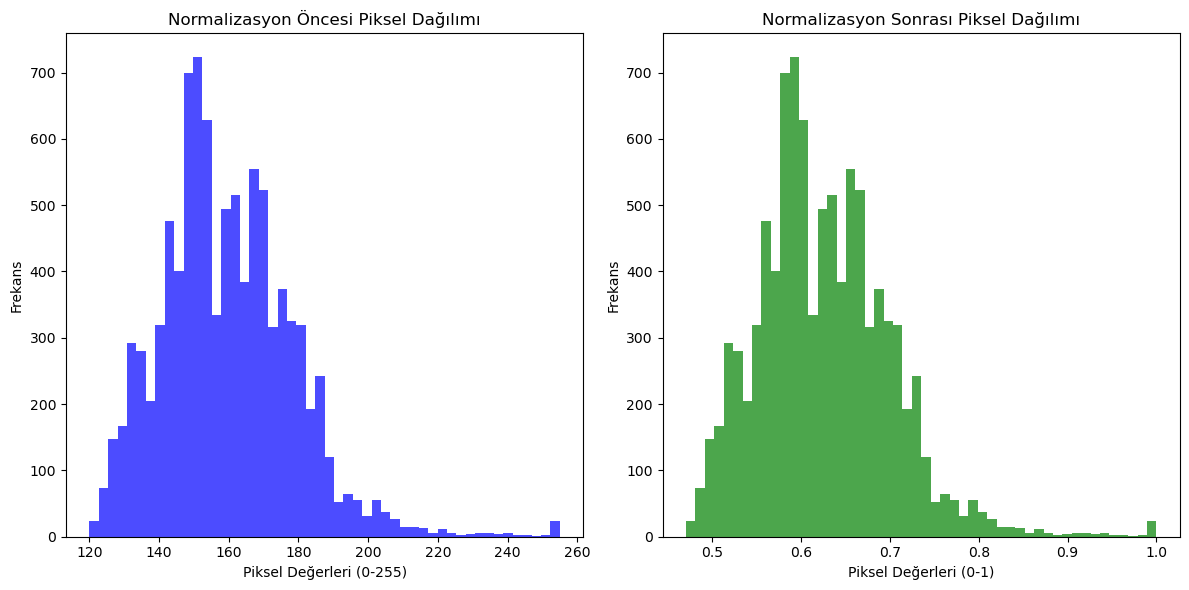

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Görüntü yolunu belirleyin
image_path = 'C:/Users/sulta/Desktop/GC/02-uodev/data/Train/1/00001_00000_00000.png'  # Örnek görüntü

# Görüntüyü yükle
original_image = Image.open(image_path)

# Görüntüyü numpy dizisine çevir
original_array = np.array(original_image)

# Görüntüyü normalleştir (0-1 aralığına dönüştür)
normalized_array = original_array / 255.0

# Histogramları çiz
plt.figure(figsize=(12, 6))

# Normalizasyon öncesi
plt.subplot(1, 2, 1)
plt.hist(original_array.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Normalizasyon Öncesi Piksel Dağılımı')
plt.xlabel('Piksel Değerleri (0-255)')
plt.ylabel('Frekans')

# Normalizasyon sonrası
plt.subplot(1, 2, 2)
plt.hist(normalized_array.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Normalizasyon Sonrası Piksel Dağılımı')
plt.xlabel('Piksel Değerleri (0-1)')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


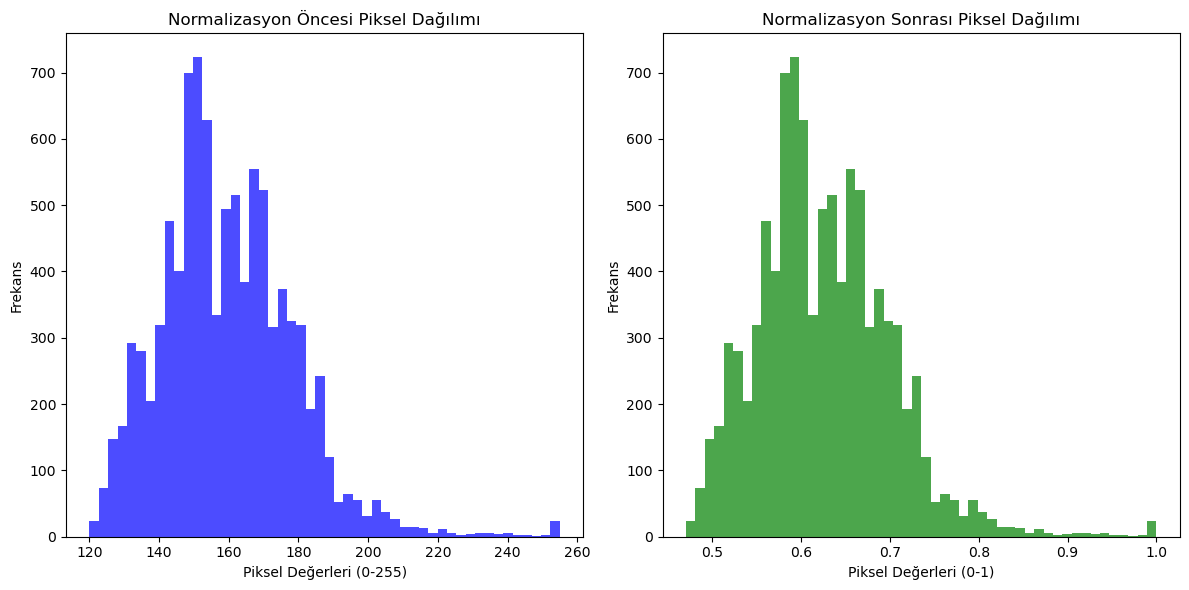

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Örnek bir görsel yolu (kendi veri yolunuza göre güncelleyin)
image_path = 'C:\\Users\\sulta\\Desktop\\GC\\02-uodev\\data\\Train\\1\\00001_00000_00000.png'

# Görseli yükle ve piksel değerlerini al
original_image = Image.open(image_path).convert('RGB')
original_pixels = np.array(original_image).flatten()  # Görüntüyü düzleştir

# Görseli normalize et (0-1 aralığına getir)
normalized_pixels = original_pixels / 255.0

# Grafik oluştur
plt.figure(figsize=(12, 6))

# Normalizasyon öncesi histogram
plt.subplot(1, 2, 1)
plt.hist(original_pixels, bins=50, color='blue', alpha=0.7)
plt.title("Normalizasyon Öncesi Piksel Dağılımı")
plt.xlabel("Piksel Değerleri (0-255)")
plt.ylabel("Frekans")

# Normalizasyon sonrası histogram
plt.subplot(1, 2, 2)
plt.hist(normalized_pixels, bins=50, color='green', alpha=0.7)
plt.title("Normalizasyon Sonrası Piksel Dağılımı")
plt.xlabel("Piksel Değerleri (0-1)")
plt.ylabel("Frekans")

plt.tight_layout()
plt.show()

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,196,675 (4.56 MB)

 Trainable params: 398,891 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 797,784 (3.04 MB)

In [39]:
pip install pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


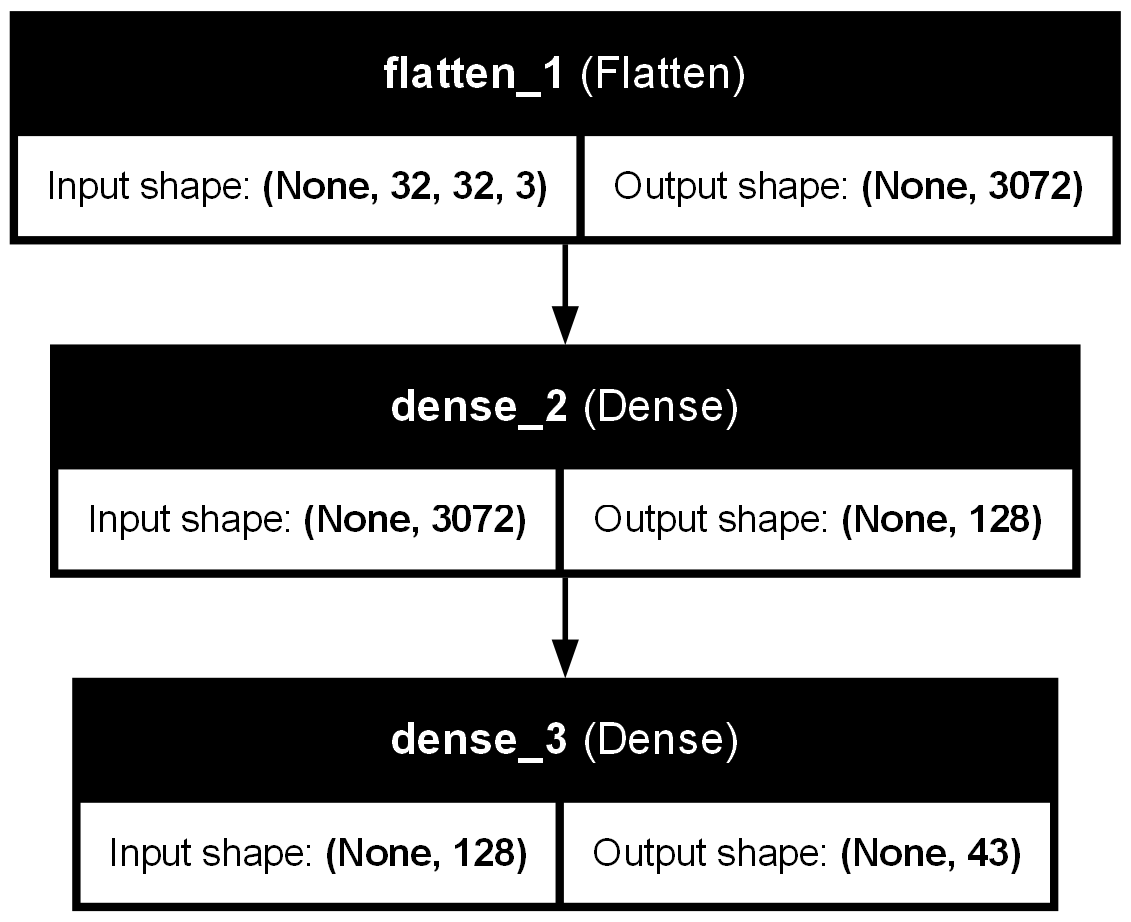

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [41]:
pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


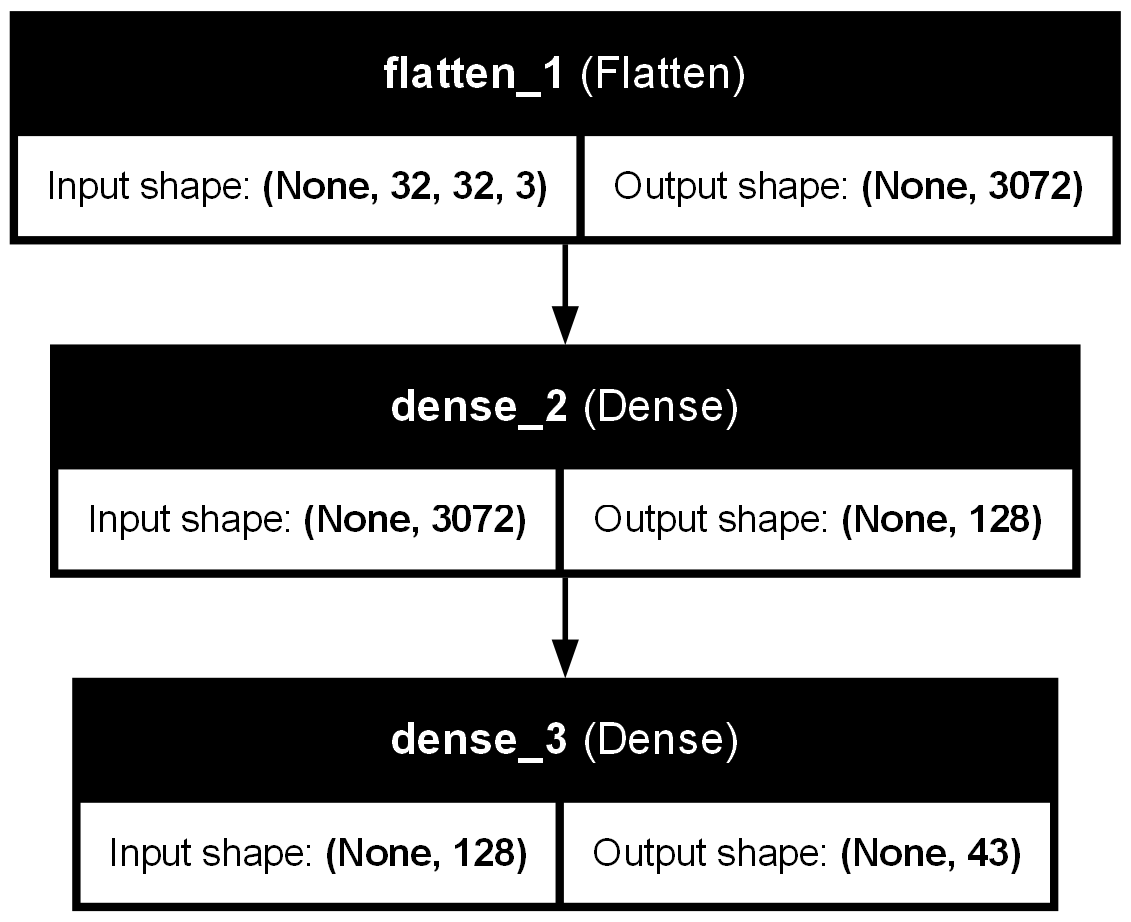

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import pandas as pd

# Hiperparametre denemeleri için değerler
epochs_list = [10, 20, 30]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]

# Sonuçları saklamak için bir liste
results = []

# Hiperparametre denemeleri
for epochs in epochs_list:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"Epochs: {epochs}, Learning Rate: {lr}, Batch Size: {batch_size}")
            
            # Modeli oluştur
            model = Sequential([
                Flatten(input_shape=(32, 32, 3)),
                Dense(128, activation='relu'),
                Dense(len(train_labels[0]), activation='softmax')
            ])
            
            # Modeli derle
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            
            # Modeli eğit
            history = model.fit(
                train_images, train_labels,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(test_images, test_labels),
                verbose=0
            )
            
            # Sonuçları kaydet
            final_train_acc = history.history['accuracy'][-1]
            final_val_acc = history.history['val_accuracy'][-1]
            final_train_loss = history.history['loss'][-1]
            final_val_loss = history.history['val_loss'][-1]
            
            results.append({
                'Epochs': epochs,
                'Learning Rate': lr,
                'Batch Size': batch_size,
                'Train Accuracy': final_train_acc,
                'Validation Accuracy': final_val_acc,
                'Train Loss': final_train_loss,
                'Validation Loss': final_val_loss
            })

# Sonuçları tabloya çevir
results_df = pd.DataFrame(results)


Epochs: 10, Learning Rate: 0.001, Batch Size: 32


C:\Users\sulta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epochs: 10, Learning Rate: 0.001, Batch Size: 64
Epochs: 10, Learning Rate: 0.001, Batch Size: 128
Epochs: 10, Learning Rate: 0.01, Batch Size: 32
Epochs: 10, Learning Rate: 0.01, Batch Size: 64
Epochs: 10, Learning Rate: 0.01, Batch Size: 128
Epochs: 10, Learning Rate: 0.1, Batch Size: 32
Epochs: 10, Learning Rate: 0.1, Batch Size: 64
Epochs: 10, Learning Rate: 0.1, Batch Size: 128
Epochs: 20, Learning Rate: 0.001, Batch Size: 32
Epochs: 20, Learning Rate: 0.001, Batch Size: 64
Epochs: 20, Learning Rate: 0.001, Batch Size: 128
Epochs: 20, Learning Rate: 0.01, Batch Size: 32
Epochs: 20, Learning Rate: 0.01, Batch Size: 64
Epochs: 20, Learning Rate: 0.01, Batch Size: 128
Epochs: 20, Learning Rate: 0.1, Batch Size: 32
Epochs: 20, Learning Rate: 0.1, Batch Size: 64
Epochs: 20, Learning Rate: 0.1, Batch Size: 128
Epochs: 30, Learning Rate: 0.001, Batch Size: 32
Epochs: 30, Learning Rate: 0.001, Batch Size: 64
Epochs: 30, Learning Rate: 0.001, Batch Size: 128
Epochs: 30, Learning Rate: 0.01

In [44]:
# İlk 5 sonucu görüntüleyin
print(results_df.head())

# Tabloyu kaydet
results_df.to_csv("hyperparameter_results.csv", index=False)

   Epochs  Learning Rate  Batch Size  Train Accuracy  Validation Accuracy  \
0      10          0.001          32        0.057028             0.059382   
1      10          0.001          64        0.057461             0.059382   
2      10          0.001         128        0.101405             0.105938   
3      10          0.010          32        0.055880             0.057007   
4      10          0.010          64        0.055395             0.059382   

   Train Loss  Validation Loss  
0    3.485910         3.463017  
1    3.485574         3.464263  
2    3.254200         3.217836  
3    3.488465         3.464034  
4    3.487822         3.464427  


In [45]:
# En yüksek Validation Accuracy'e göre sıralama
best_result = results_df.loc[results_df['Validation Accuracy'].idxmax()]
print("En iyi hiperparametre kombinasyonu:")
print(best_result)

En iyi hiperparametre kombinasyonu:
Epochs                  10.000000
Learning Rate            0.001000
Batch Size             128.000000
Train Accuracy           0.101405
Validation Accuracy      0.105938
Train Loss               3.254200
Validation Loss          3.217836
Name: 2, dtype: float64


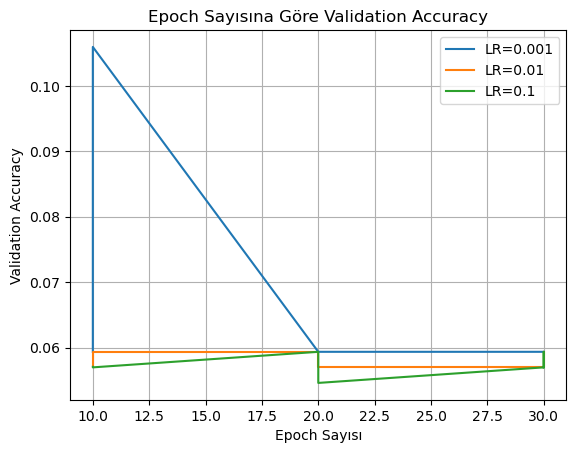

In [46]:
import matplotlib.pyplot as plt

# Epoch - Validation Accuracy grafiği
for lr in learning_rates:
    subset = results_df[results_df['Learning Rate'] == lr]
    plt.plot(subset['Epochs'], subset['Validation Accuracy'], label=f"LR={lr}")

plt.title("Epoch Sayısına Göre Validation Accuracy")
plt.xlabel("Epoch Sayısı")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


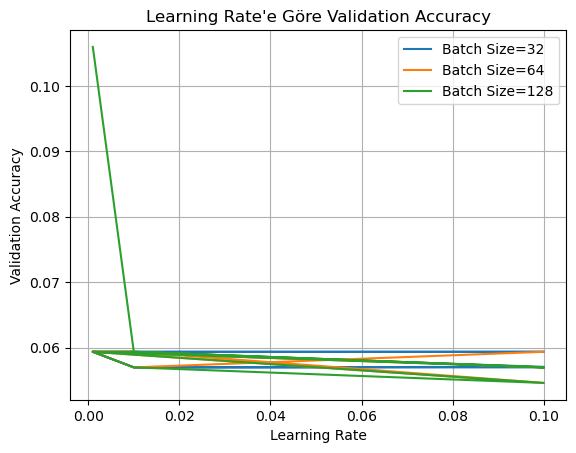

In [47]:
# Learning Rate - Validation Accuracy grafiği
for batch_size in batch_sizes:
    subset = results_df[results_df['Batch Size'] == batch_size]
    plt.plot(subset['Learning Rate'], subset['Validation Accuracy'], label=f"Batch Size={batch_size}")

plt.title("Learning Rate'e Göre Validation Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


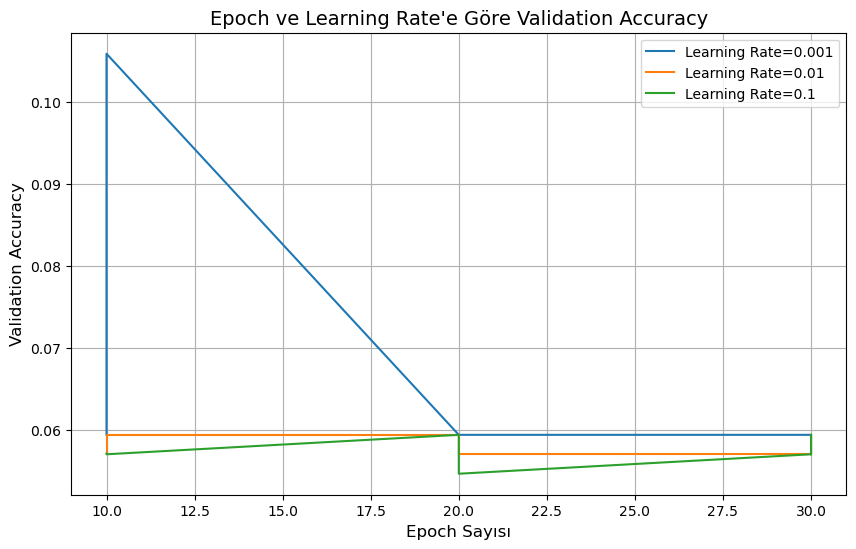

In [48]:
import matplotlib.pyplot as plt

# Hiperparametre sonuçlarının dataframe'inden farklı learning rate'leri filtrele
learning_rates = results_df['Learning Rate'].unique()

# Grafik oluştur
plt.figure(figsize=(10, 6))

# Her bir learning rate için epoch doğruluğunu çizdir
for lr in learning_rates:
    subset = results_df[results_df['Learning Rate'] == lr]
    plt.plot(subset['Epochs'], subset['Validation Accuracy'], label=f'Learning Rate={lr}')

# Grafik ayarları
plt.title('Epoch ve Learning Rate\'e Göre Validation Accuracy', fontsize=14)
plt.xlabel('Epoch Sayısı', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Veri standardizasyonu için pipeline oluştur
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', gamma='scale'))
])

# Modeli eğit
pipeline.fit(train_images.reshape(len(train_images), -1), np.argmax(train_labels, axis=1))

# Tahmin yap
predictions = pipeline.predict(test_images.reshape(len(test_images), -1))

# Performans değerlendirme
print("Classification Report:")
print(classification_report(np.argmax(test_labels, axis=1), predictions))

print("Confusion Matrix:")
print(confusion_matrix(np.argmax(test_labels, axis=1), predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.20      0.33        60
           1       0.63      0.84      0.72       720
           2       0.63      0.69      0.66       750
           3       0.45      0.47      0.46       450
           4       0.59      0.67      0.63       660
           5       0.46      0.63      0.53       630
           6       0.53      0.41      0.47       150
           7       0.81      0.58      0.68       450
           8       0.58      0.77      0.66       450
           9       0.92      0.71      0.80       480
          10       0.75      0.90      0.82       660
          11       0.67      0.83      0.74       420
          12       0.90      0.91      0.91       690
          13       0.97      0.98      0.98       720
          14       0.96      0.79      0.87       270
          15       0.91      0.68      0.78       210
          16       0.97      0.67      0.79       150
    

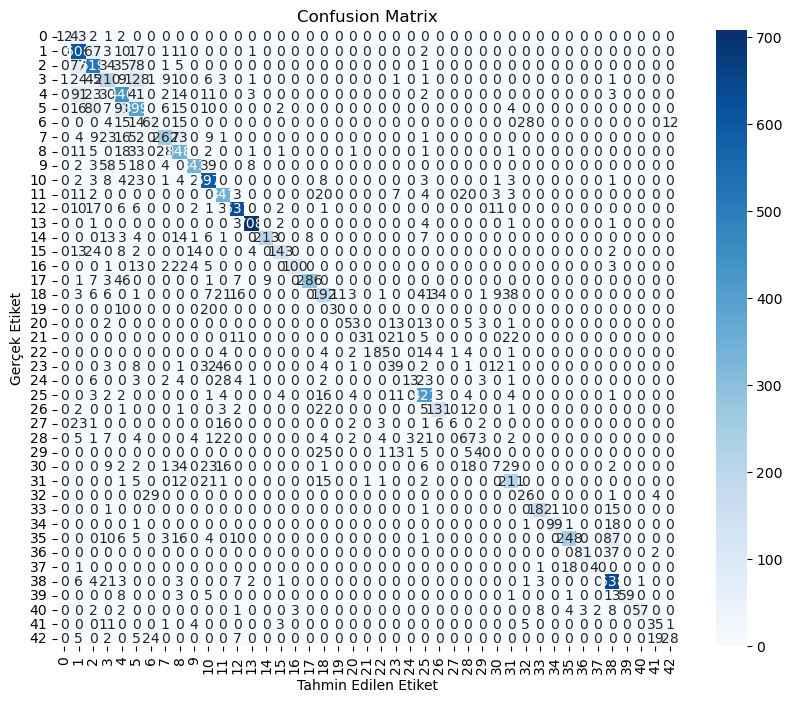

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix oluştur
cm = confusion_matrix(np.argmax(test_labels, axis=1), predictions)

# Görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(np.unique(np.argmax(test_labels, axis=1)))), 
            yticklabels=range(len(np.unique(np.argmax(test_labels, axis=1)))))
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()
